In [ ]:
### OPERACIONES BÁSICAS CON PANDAS

#Este tutorial esta basado en https://es.hortonworks.com/tutorial/beginners-guide-to-apache-pig/

#Preparación

import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)

In [ ]:
#Carga de los datos de los eventos de los conductores

truck_events = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/drivers/truck_event_text_partition.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

In [ ]:
len(truck_events)

17075

In [ ]:
truck_events.columns

Index(['driverId', 'truckId', 'eventTime', 'eventType', 'longitude',
       'latitude', 'eventKey', 'CorrelationId', 'driverName', 'routeId',
       'routeName', 'eventDate'],
      dtype='object')

In [ ]:
truck_events.describe()

           driverId       truckId  ...  CorrelationId       routeId
count  17075.000000  17075.000000  ...   1.707500e+04  1.707500e+04
mean      21.043104     55.424480  ...   5.373716e+17  1.034766e+09
std        6.612549     28.936049  ...   1.295419e+18  6.233880e+08
min       10.000000     10.000000  ...   1.000000e+03  2.492948e+07
25%       15.000000     27.000000  ...   1.000000e+03  3.711828e+08
50%       21.000000     55.000000  ...   1.000000e+03  1.198243e+09
75%       27.000000     81.000000  ...   1.000000e+03  1.565885e+09
max       32.000000    109.000000  ...   3.660000e+18  1.962262e+09

[8 rows x 6 columns]

In [ ]:
#Visualización de datos

truck_events.head(10)

   driverId  truckId  ...                               routeName      eventDate
0        14       25  ...           Joplin to Kansas City Route 2  2016-05-27-22
1        18       16  ...           Springfield to KC Via Hanibal  2016-05-27-22
2        27      105  ...  Springfield to KC Via Columbia Route 2  2016-05-27-22
3        11       74  ...           Saint Louis to Memphis Route2  2016-05-27-22
4        22       87  ...           Saint Louis to Chicago Route2  2016-05-27-22
5        22       87  ...           Saint Louis to Chicago Route2  2016-05-27-22
6        23       68  ...           Joplin to Kansas City Route 2  2016-05-27-22
7        11       74  ...           Saint Louis to Memphis Route2  2016-05-27-22
8        20       41  ...           Des Moines to Chicago Route 2  2016-05-27-22
9        32       42  ...          Peoria to Ceder Rapids Route 2  2016-05-27-22

[10 rows x 12 columns]

In [ ]:
#Obtención de un subconjunto de registros

#En hive es posible un subconjunto de datos y almacenarlo en una nueva tabla a partir de una consulta que permita obtener los datos deseados. En el siguiente código, se crea la tabla truck_events_subset con los primeros 100 registros de la tabla truck_events.

truck_events_subset = truck_events[0:10]
truck_events_subset

   driverId  truckId  ...                               routeName      eventDate
0        14       25  ...           Joplin to Kansas City Route 2  2016-05-27-22
1        18       16  ...           Springfield to KC Via Hanibal  2016-05-27-22
2        27      105  ...  Springfield to KC Via Columbia Route 2  2016-05-27-22
3        11       74  ...           Saint Louis to Memphis Route2  2016-05-27-22
4        22       87  ...           Saint Louis to Chicago Route2  2016-05-27-22
5        22       87  ...           Saint Louis to Chicago Route2  2016-05-27-22
6        23       68  ...           Joplin to Kansas City Route 2  2016-05-27-22
7        11       74  ...           Saint Louis to Memphis Route2  2016-05-27-22
8        20       41  ...           Des Moines to Chicago Route 2  2016-05-27-22
9        32       42  ...          Peoria to Ceder Rapids Route 2  2016-05-27-22

[10 rows x 12 columns]

In [ ]:
#Obtención de un subconjunto de columnas

specific_columns = truck_events_subset[['driverId','eventTime','eventType']]
specific_columns

   driverId eventTime eventType
0        14   59:21.4    Normal
1        18   59:21.7    Normal
2        27   59:21.7    Normal
3        11   59:21.7    Normal
4        22   59:21.7    Normal
5        22   59:22.3    Normal
6        23   59:22.4    Normal
7        11   59:22.5    Normal
8        20   59:22.5    Normal
9        32   59:22.5    Normal

In [ ]:
# Obtención de un subconjunto de filas y columnas

new_sub_set = truck_events.loc[0:10, ['driverId','eventTime','eventType']]
new_sub_set

    driverId eventTime eventType
0         14   59:21.4    Normal
1         18   59:21.7    Normal
2         27   59:21.7    Normal
3         11   59:21.7    Normal
4         22   59:21.7    Normal
5         22   59:22.3    Normal
6         23   59:22.4    Normal
7         11   59:22.5    Normal
8         20   59:22.5    Normal
9         32   59:22.5    Normal
10        27   59:22.6    Normal

In [ ]:
#Obtención de un campo de un registro en particular

truck_events.iloc[1]

driverId                                    18
truckId                                     16
eventTime                              59:21.7
eventType                               Normal
longitude                               -89.66
latitude                                 39.78
eventKey             18|16|9223370572464814089
CorrelationId                         3.66e+18
driverName                           Grant Liu
routeId                             1565885487
routeName        Springfield to KC Via Hanibal
eventDate                        2016-05-27-22
Name: 1, dtype: object

In [ ]:
truck_events.iloc[1].eventKey

'18|16|9223370572464814089'

In [ ]:
truck_events.iloc[1]['eventKey']

'18|16|9223370572464814089'

In [ ]:
#Escritura de la tabla en el disco

#Seguidamente, se procede a escribir el contenido de la tabla en el directorio tmp/ de la carpeta actual.

!mkdir -p tmp

In [ ]:
specific_columns.to_csv('tmp/specific_columns.csv',
                       sep=',',
                       header=True,
                       index=False)

In [ ]:
##
## Se visualiza el contenido del directorio
##
!ls tmp/

specific_columns.csv


In [ ]:
##
## Se visualiza la parte final del archivo
##
!cat tmp/specific_columns.csv

driverId,eventTime,eventType
14,59:21.4,Normal
18,59:21.7,Normal
27,59:21.7,Normal
11,59:21.7,Normal
22,59:21.7,Normal
22,59:22.3,Normal
23,59:22.4,Normal
11,59:22.5,Normal
20,59:22.5,Normal
32,59:22.5,Normal


In [ ]:
###______________________________________________________________

# PROCESAMIENTO DE DATOS CON PANDAS

#Preparación

## importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)##

## Lista los archivos.
##
!ls -1 files/drivers/*

ls: cannot access 'files/drivers/*': No such file or directory


In [ ]:
##
## Se imprime el final del archivo drivers
##
!head files/drivers/drivers.csv

head: cannot open 'files/drivers/drivers.csv' for reading: No such file or directory


In [ ]:
!head files/drivers/timesheet.csv

head: cannot open 'files/drivers/timesheet.csv' for reading: No such file or directory


In [ ]:
#Creación de la tabla drivers

#A continuación se crea la tabla driverscomo un DataFrame de Pandas.

drivers = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/drivers/drivers.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

In [ ]:
drivers.head(10)

   driverId               name  ...  certified wage-plan
0        10  George Vetticaden  ...          N     miles
1        11     Jamie Engesser  ...          N     miles
2        12        Paul Coddin  ...          Y     hours
3        13        Joe Niemiec  ...          Y     hours
4        14         Adis Cesir  ...          Y     hours
5        15       Rohit Bakshi  ...          Y     hours
6        16         Tom McCuch  ...          Y     hours
7        17        Eric Mizell  ...          Y     hours
8        18          Grant Liu  ...          Y     hours
9        19         Ajay Singh  ...          Y     hours

[10 rows x 6 columns]

In [ ]:
#Creación de la tabla timesheet

timesheet = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/drivers/timesheet.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

In [ ]:
timesheet.head(10)

   driverId  week  hours-logged  miles-logged
0        10     1            70          3300
1        10     2            70          3300
2        10     3            60          2800
3        10     4            70          3100
4        10     5            70          3200
5        10     6            70          3300
6        10     7            70          3000
7        10     8            70          3300
8        10     9            70          3200
9        10    10            50          2500

In [ ]:
#Cantidad de horas y millas de cada conductor por año

sum_timesheet = (timesheet.groupby('driverId').sum())
sum_timesheet.head()

          week  hours-logged  miles-logged
driverId                                  
10        1378          3232        147150
11        1378          3642        179300
12        1378          2639        135962
13        1378          2727        134126
14        1378          2781        136624

In [ ]:
sum_timesheet = sum_timesheet[['hours-logged', 'miles-logged']]
sum_timesheet.head()

          hours-logged  miles-logged
driverId                            
10                3232        147150
11                3642        179300
12                2639        135962
13                2727        134126
14                2781        136624

In [ ]:
#sum_timesheet['driverId'] = sum_timesheet.index.tolist()
#sum_timesheet.head()

In [ ]:
#Unión de las tablas

summary = pd.merge(sum_timesheet, drivers[['driverId', 'name']], on='driverId')
summary

    driverId  hours-logged  miles-logged                 name
0         10          3232        147150    George Vetticaden
1         11          3642        179300       Jamie Engesser
2         12          2639        135962          Paul Coddin
3         13          2727        134126          Joe Niemiec
4         14          2781        136624           Adis Cesir
5         15          2734        138750         Rohit Bakshi
6         16          2746        137205           Tom McCuch
7         17          2701        135992          Eric Mizell
8         18          2654        137834            Grant Liu
9         19          2738        137968           Ajay Singh
10        20          2644        134564         Chris Harris
11        21          2751        138719         Jeff Markham
12        22          2733        137550        Nadeem Asghar
13        23          2750        137980            Adam Diaz
14        24          2647        134461          Don Hilborn
15      

In [ ]:
#Almacenamiento de los resultados

#Finalmente, se almacena la tabla final obtenida en el archivo tmp/summary.csv para que otras aplicaciones puedan usar estos resultados.

!mkdir -p tmp
summary.to_csv(
    'tmp/summary.csv',
    sep = ',',
    header = True,
    index = False)

In [ ]:
!head tmp/summary.csv

driverId,hours-logged,miles-logged,name
10,3232,147150,George Vetticaden
11,3642,179300,Jamie Engesser
12,2639,135962,Paul Coddin
13,2727,134126,Joe Niemiec
14,2781,136624,Adis Cesir
15,2734,138750,Rohit Bakshi
16,2746,137205,Tom McCuch
17,2701,135992,Eric Mizell
18,2654,137834,Grant Liu


In [ ]:
#__________________________________________________________________________________

#ANÁLISIS DE DATOS CON PANDAS

#Preparación

## importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)

In [ ]:
#Carga de datos con Pandas

##
## Crea un DataFrame a partir del archivo fligths.csv
##
flights = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/to-do/flights.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

In [ ]:
##
## Se imprime el esquema para verificar la lectura
## del archivo.
##
flights.describe()

           Year     Month  ...  SecurityDelay  LateAircraftDelay
count  100000.0  100000.0  ...   19629.000000       19629.000000
mean     2008.0       1.0  ...       0.110805          29.343675
std         0.0       0.0  ...       1.724888          39.753529
min      2008.0       1.0  ...       0.000000           0.000000
25%      2008.0       1.0  ...       0.000000           1.000000
50%      2008.0       1.0  ...       0.000000          18.000000
75%      2008.0       1.0  ...       0.000000          37.000000
max      2008.0       1.0  ...      88.000000         434.000000

[8 rows x 24 columns]

In [ ]:
##
## Se imprime un subconjunto de las columnas para verificar
## la lectura
##
flights[['UniqueCarrier', 'FlightNum', 'DepDelay', 'ArrDelay', 'Distance']].head(5)

  UniqueCarrier  FlightNum  DepDelay  ArrDelay  Distance
0            WN        335       8.0     -14.0       810
1            WN       3231      19.0       2.0       810
2            WN        448       8.0      14.0       515
3            WN       1746      -4.0      -6.0       515
4            WN       3920      34.0      34.0       515

In [ ]:
##
## Número total de registros leidos
##
numTotalFlights = len(flights)
numTotalFlights

100000

In [ ]:
#Cálculos usando funciones de los DataFrames

#Cómputo del porcentaje de vuelos retrasados

##
## La variable delayedFlights contiene las columnas UniqueCarrier y DepDelay
## para los vuelos con DepDelay > 15 minutos.
##
delayedFlights = flights[flights['DepDelay']>15][['UniqueCarrier','DepDelay']]
delayedFlights.head(5)

   UniqueCarrier  DepDelay
1             WN      19.0
4             WN      34.0
5             WN      25.0
6             WN      67.0
11            WN      94.0

In [ ]:
##
## Porcentaje de vuelos retrasados.
##
numDelayedFlights = len(delayedFlights)
numDelayedFlights
print("Porcentaje de vuelos retrasados: " + str(numDelayedFlights/numTotalFlights*100) + "%")

Porcentaje de vuelos retrasados: 19.587%


In [ ]:
#Creación de variables usando funciones de usuario

#A continuación se desea crear una nueva columna llamada IsDelayed que vale 0 si el vuelo se realizó a tiempo y 1 si se retraso.

flightsWithDelays = flights[['Year',
                             'Month',
                             'DayofMonth',
                             'UniqueCarrier',
                             'FlightNum',
                             'DepDelay']].copy()

flightsWithDelays['IsDelayed'] =  flightsWithDelays['DepDelay'].copy()
flightsWithDelays['IsDelayed'] = flightsWithDelays['IsDelayed'].map(lambda x: 1 if x > 15 else 0)
flightsWithDelays['IsDelayed'] = flightsWithDelays['IsDelayed'].map(lambda x: 0 if np.isnan(x) else x)

flightsWithDelays[['DepDelay', 'IsDelayed']].head(10)

   DepDelay  IsDelayed
0       8.0          0
1      19.0          1
2       8.0          0
3      -4.0          0
4      34.0          1
5      25.0          1
6      67.0          1
7      -1.0          0
8       2.0          0
9       0.0          0

In [ ]:
##
## A continuación, se calcula el porcentaje de vuelos con retrasos
##
flightsWithDelays.IsDelayed.sum() / flightsWithDelays.DepDelay.count()

0.19813267515021546

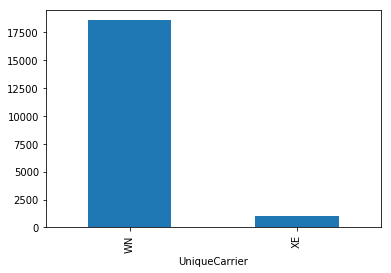

In [ ]:
##
## Retrasos por transportador
##
%matplotlib inline
flights['IsDelayed'] = flights['DepDelay'].copy()
flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 1 if x > 15 else 0)
flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 0 if np.isnan(x) else x)
(flights.groupby('UniqueCarrier').sum())["IsDelayed"].plot.bar();

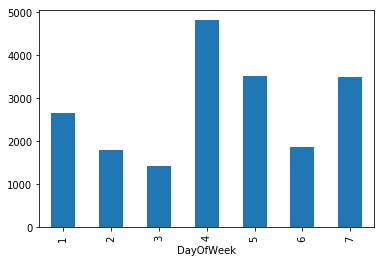

In [ ]:
#Retrasos por día de la semana

##
## Compute los retrasos por dia de la semana
##
(flights.groupby('DayOfWeek').sum())["IsDelayed"].plot.bar();

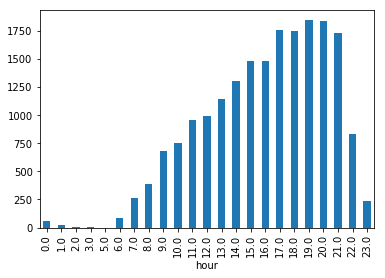

In [ ]:
#Retrasos por hora del día

##
## Compute los retrasos por hora del dia
##
flights['hour'] = flights['DepTime'].copy()
flights['hour'] = flights['hour'].map(lambda x: int(x/100) if not np.isnan(x) else x)
(flights.groupby('hour').sum())["IsDelayed"].plot.bar();

In [ ]:
#____________________________________________________________--

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Carga de datos

df = pd.read_csv(
    "https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv",
    sep = ',',
    thousands = None,
    decimal = '.')

In [ ]:
%%R
library(dplyr)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [ ]:
#Select
##
##  SELECT
##      total_bill,
##      tip,
##      smoker,
##      time
##  FROM
##      df
##  LIMIT 5;
##
df[['total_bill', 'tip', 'smoker', 'time']].head(5)

   total_bill   tip smoker    time
0       16.99  1.01     No  Dinner
1       10.34  1.66     No  Dinner
2       21.01  3.50     No  Dinner
3       23.68  3.31     No  Dinner
4       24.59  3.61     No  Dinner

In [ ]:
%%R -i df
df %>% select(total_bill, tip , smoker, time) %>% head(5)

ValueError: ignored